In [0]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [37]:
pip install memory_profiler

In [0]:
import tensorflow as tf

(X_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

X_train = np.reshape(X_train, newshape=(-1, 28*28))

n_samples, n_features = X_train.shape
n_neighbors = 30

In [0]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [40]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
# Utility function to visualize the outputs of PCA and t-SNE
from numpy.random import random

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)], label=labels)
    ax.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Label')

    legs = (plt.scatter(random(10), random(10), marker='o', color=palette[i]) for i in range(10))

    ax.legend(legs,
           labels,
           scatterpoints=1,
           ncol=3,
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # plt.xlim(25, 25)
    # plt.ylim(25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, labels[i], fontsize=14)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [42]:
# Subset first 20k data points to visualize
x_subset = X_train[0:20000]
y_subset = y_train[0:20000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


In [43]:
load_ext memory_profiler


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


### PCA

In [48]:
!pip install mprun_demo

ERROR: Could not find a version that satisfies the requirement mprun_demo (from versions: none)
ERROR: No matching distribution found for mprun_demo


In [54]:
#from memory_profiler import profile
#from mprun_demo import sum_of_lists
#mprun -f sum_of_lists sum_of_lists(1000000)


from sklearn.decomposition import PCA
#@profile(precision=4)

def pca_results(arg):
  return pca.fit_transform(arg)

time_start = time.time()

pca = PCA(n_components=4)
pca_result= pca.fit_transform(x_subset)
#pca_result = lambda l:pca.fit_transform(l)
%memit pca_results(x_subset)
print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

peak memory: 910.00 MiB, increment: 0.08 MiB
PCA done! Time elapsed: 3.533524513244629 seconds


In [55]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.29021329 0.1778743  0.06015076 0.04975864]


(<Figure size 576x576 with 1 Axes>,
 [Text(774.4497664226266, -689.6949155669788, 'T-shirt/top'),
  Text(42.863819260252754, -1429.3643908377107, 'Trouser'),
  Text(1098.2843326494876, 376.97532328335467, 'Pullover'),
  Text(329.27198606816137, -1111.489809102804, 'Dress'),
  Text(1266.9709868257025, 295.466200828754, 'Coat'),
  Text(-1589.5573233922328, 61.86773398348012, 'Sandal'),
  Text(713.4727983676885, -65.68701123093862, 'Shirt'),
  Text(-1521.4109429503305, 335.6656252889621, 'Sneaker'),
  Text(63.817681716780314, 1003.3250404570094, 'Bag'),
  Text(-645.690609126612, 1168.2384038942641, 'Ankle boot')])

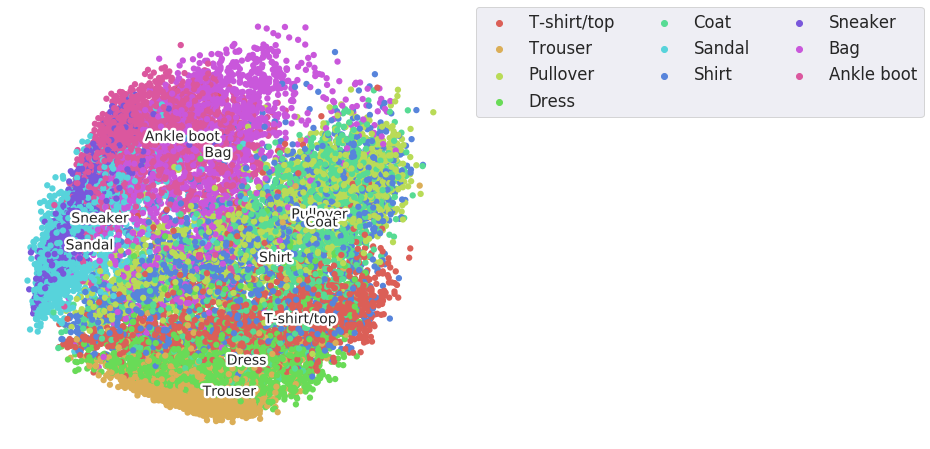

In [12]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

### t-SNE

In [56]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
def fashion_tsne(arg):
  return TSNE(random_state=RS).fit_transform(arg)
%memit fashion_tsne(x_subset)
#fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

peak memory: 949.23 MiB, increment: 39.23 MiB
t-SNE done! Time elapsed: 870.3927755355835 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(41.57853, 6.2938895, 'T-shirt/top'),
  Text(16.529232, 61.37285, 'Trouser'),
  Text(13.9984, -39.075554, 'Pullover'),
  Text(23.668945, 24.115776, 'Dress'),
  Text(31.92881, -32.853615, 'Coat'),
  Text(-36.646145, 5.3290944, 'Sandal'),
  Text(16.96063, -17.384825, 'Shirt'),
  Text(-59.432877, -11.076068, 'Sneaker'),
  Text(-22.520933, -37.156204, 'Bag'),
  Text(-34.86377, 39.52498, 'Ankle boot')])

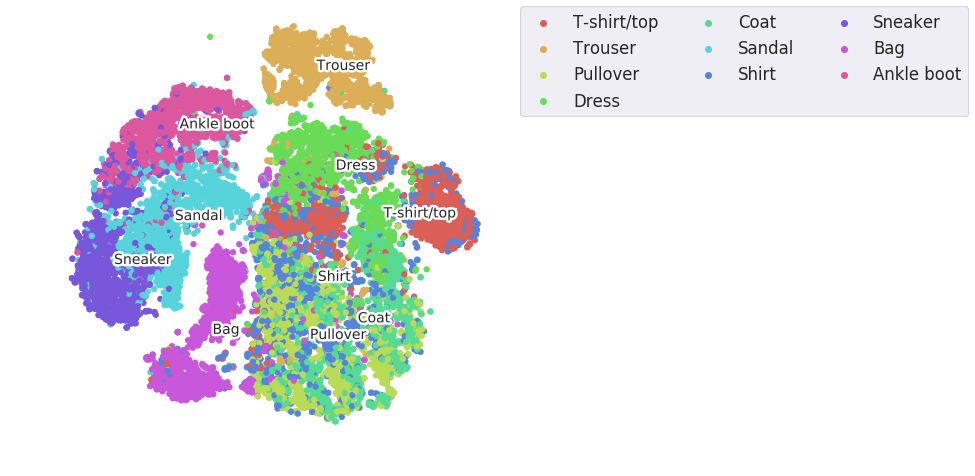

In [0]:
fashion_scatter(fashion_tsne, y_subset)

### UMAP

In [0]:
import umap

In [0]:
reducer = umap.UMAP()

In [59]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
def fashion_umap(arg):
  return reducer.fit_transform(arg)
%memit fashion_umap(x_subset)

#fashion_umap = reducer.fit_transform(x_subset)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

peak memory: 1031.19 MiB, increment: 23.04 MiB
UMAP done! Time elapsed: 37.905333042144775 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(3.776694, -0.009076844, 'T-shirt/top'),
  Text(3.773685, 9.2598715, 'Trouser'),
  Text(2.9204602, -4.984925, 'Pullover'),
  Text(3.2862585, 2.3120277, 'Dress'),
  Text(4.3839116, -4.3995833, 'Coat'),
  Text(-6.4727125, 3.3812304, 'Sandal'),
  Text(2.9234629, -2.9753368, 'Shirt'),
  Text(-8.142961, 4.9862604, 'Sneaker'),
  Text(-2.099517, -5.221061, 'Bag'),
  Text(-7.6547956, 0.12302601, 'Ankle boot')])

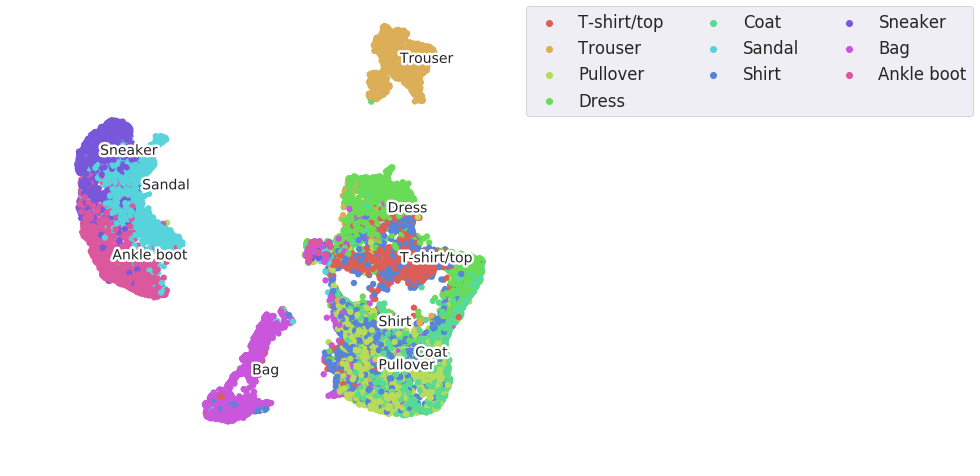

In [0]:
fashion_scatter(fashion_umap, y_subset)

### LDA

In [60]:
from sklearn import discriminant_analysis
import time
time_start = time.time()
def fashion_lda(arg1,arg2):
  return discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(arg1,arg2)
%memit fashion_lda(x_subset,y_subset)

#fashion_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(x_subset, y_subset)

print('LDA done! Time elapsed: {} seconds'.format(time.time()-time_start))

peak memory: 1546.52 MiB, increment: 527.27 MiB
LDA done! Time elapsed: 6.673815488815308 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-2.440159705241859, 1.2312691155182223, 'T-shirt/top'),
  Text(-4.477704547150046, -7.248890567820077, 'Trouser'),
  Text(-2.4963054570126406, 1.816238711879218, 'Pullover'),
  Text(-2.391094096026467, -0.04864427716508318, 'Dress'),
  Text(-2.7368632971352542, 1.990005551268713, 'Coat'),
  Text(3.1396491253224648, -0.08757058821457721, 'Sandal'),
  Text(-2.195592342919614, 1.920542975257177, 'Shirt'),
  Text(5.603694482388554, -0.9001738972598681, 'Sneaker'),
  Text(0.38445182117384047, 2.5969786165977125, 'Bag'),
  Text(7.265687820909548, -1.2933536628545146, 'Ankle boot')])

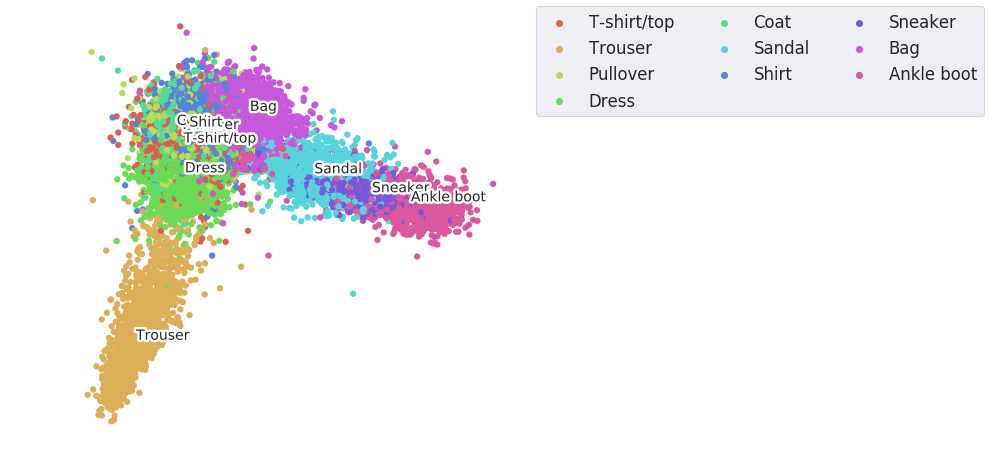

In [0]:
fashion_scatter(fashion_lda, y_subset)

In [0]:
from sklearn.decomposition import TruncatedSVD

time_start = time.time()
fashion_svd = TruncatedSVD(n_components=2).fit_transform(x_subset)

print('SVD done! Time elapsed: {} seconds'.format(time.time()-time_start))

SVD done! Time elapsed: 1.182793378829956 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(2906.735883847047, -816.4847012159347, 'T-shirt/top'),
  Text(2150.4649027232194, -1170.5434001870815, 'Trouser'),
  Text(3430.706127050732, -18.785004694690834, 'Pullover'),
  Text(2508.333936354477, -967.5723226652145, 'Dress'),
  Text(3617.4870700876413, -125.6633740530048, 'Coat'),
  Text(1008.184035286065, 717.5572223092706, 'Sandal'),
  Text(2973.932869519487, -161.41135718495514, 'Shirt'),
  Text(1398.2343544155806, 1037.3091279723058, 'Sneaker'),
  Text(2841.4640568599434, 966.4827537282187, 'Bag'),
  Text(2464.1952054174308, 1453.7578523996622, 'Ankle boot')])

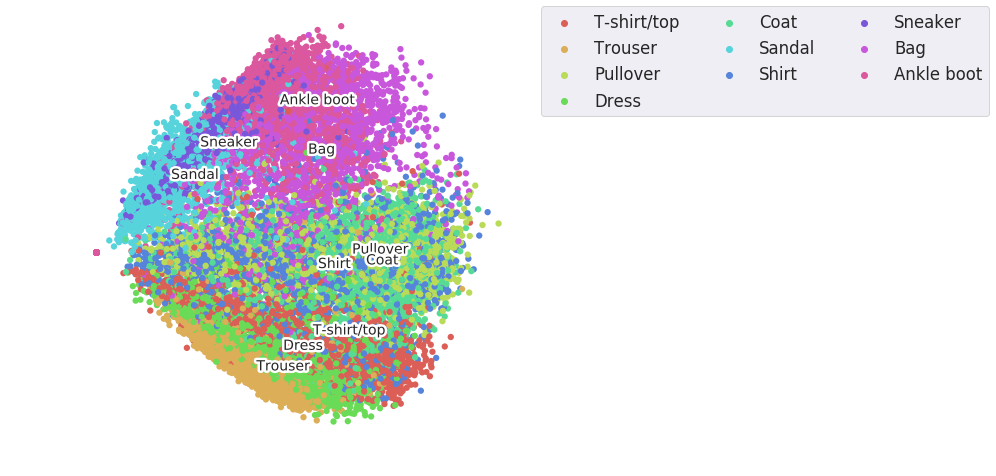

In [0]:
fashion_scatter(fashion_svd, y_subset)

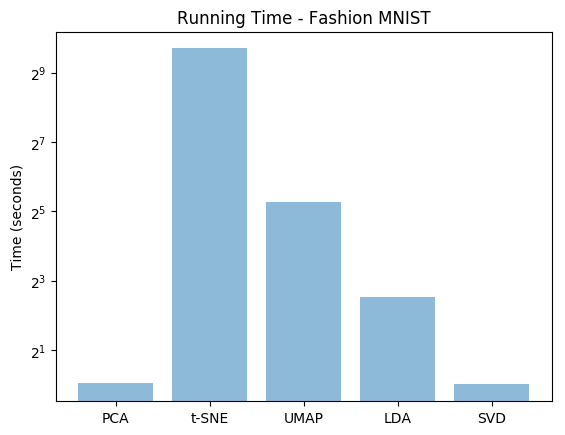

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('PCA', 't-SNE', 'UMAP', 'LDA', 'SVD')
y_pos = np.arange(len(objects))
performance = [1.05, 830.18, 38.80, 5.79, 1.01]

plt.bar(y_pos, performance, align='center', alpha=0.5)
ax = plt.gca()

# Set x logaritmic
ax.set_yscale('log', basey=2)
plt.xticks(y_pos, objects)
plt.ylabel('Time (seconds)')
plt.title('Running Time - Fashion MNIST')

plt.show()

In [0]:
## Try Classification with Random Forest
# 1. without dimensionality reduction
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

skfold = model_selection.StratifiedKFold(n_splits=3, random_state=100)
model_kfold = RandomForestClassifier(n_estimators=100, random_state=10)
results_kfold = model_selection.cross_val_score(model_kfold, x_subset, y_subset, cv=skfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))
results_kfold = results_kfold.mean()

Accuracy: 86.21%


In [0]:
# 2. Using PCA
skfold = model_selection.StratifiedKFold(n_splits=3, random_state=100)
model_kfold = RandomForestClassifier(n_estimators=100, random_state=10)
results_kfold_pca = model_selection.cross_val_score(model_kfold, top_two_comp, y_subset, cv=skfold)
print("Accuracy: %.2f%%" % (results_kfold_pca.mean()*100.0)) 
results_kfold_pca = results_kfold_pca.mean()

Accuracy: 50.25%


In [0]:
# 3. Using t-SNE
skfold = model_selection.StratifiedKFold(n_splits=3, random_state=100)
model_kfold = RandomForestClassifier(n_estimators=100, random_state=10)
results_kfold_tsne = model_selection.cross_val_score(model_kfold, fashion_tsne, y_subset, cv=skfold)
print("Accuracy: %.2f%%" % (results_kfold_tsne.mean()*100.0))
results_kfold_tsne = results_kfold_tsne.mean()

Accuracy: 81.79%


In [0]:
# 3. Using LDA
skfold = model_selection.StratifiedKFold(n_splits=3, random_state=100)
model_kfold = RandomForestClassifier(n_estimators=100, random_state=10)
results_kfold_tsne = model_selection.cross_val_score(model_kfold, fashion_lda, y_subset, cv=skfold)
print("Accuracy: %.2f%%" % (results_kfold_tsne.mean()*100.0))
results_kfold_tsne = results_kfold_tsne.mean()

Accuracy: 57.07%


In [0]:
# 4. Using UMAP
skfold = model_selection.StratifiedKFold(n_splits=3, random_state=100)
model_kfold = RandomForestClassifier(n_estimators=100, random_state=10)
results_kfold_umap = model_selection.cross_val_score(model_kfold, fashion_umap, y_subset, cv=skfold)
print("Accuracy: %.2f%%" % (results_kfold_umap.mean()*100.0))
results_kfold_umap = results_kfold_umap.mean()

Accuracy: 74.97%


In [0]:
# 5. Using SVD
skfold = model_selection.StratifiedKFold(n_splits=3, random_state=100)
model_kfold = RandomForestClassifier(n_estimators=100, random_state=10)
results_kfold_svd = model_selection.cross_val_score(model_kfold, fashion_svd, y_subset, cv=skfold)
print("Accuracy: %.2f%%" % (results_kfold_svd.mean()*100.0))
results_kfold_svd = results_kfold_svd.mean()

Accuracy: 49.90%


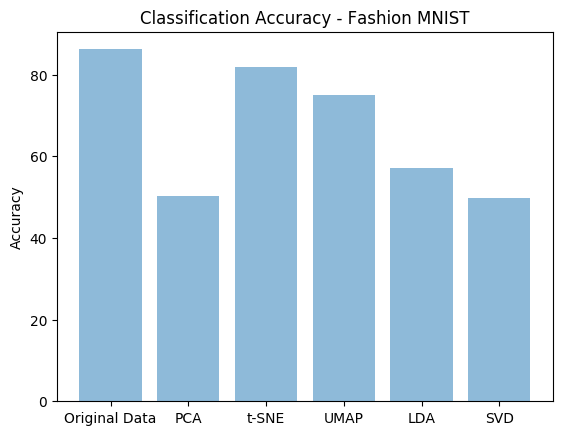

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Original Data', 'PCA', 't-SNE', 'UMAP', 'LDA', 'SVD')
y_pos = np.arange(len(objects))
performance = [86.21, 50.25, 81.79,74.97, 57.07, 49.90]

plt.bar(y_pos, performance, align='center', alpha=0.5)
ax = plt.gca()

# Set x logaritmic
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Classification Accuracy - Fashion MNIST')

plt.show()